In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data =pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
X=pd.DataFrame(data , columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
Y=data.Outcome

In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.20, random_state=0 )

In [7]:
logreg =LogisticRegression(solver='liblinear')
logreg.fit(X_train , Y_train)
Y_pred=logreg.predict(X_test)

In [8]:
print("accuracy =" , metrics.accuracy_score(Y_test , Y_pred))

accuracy = 0.8181818181818182


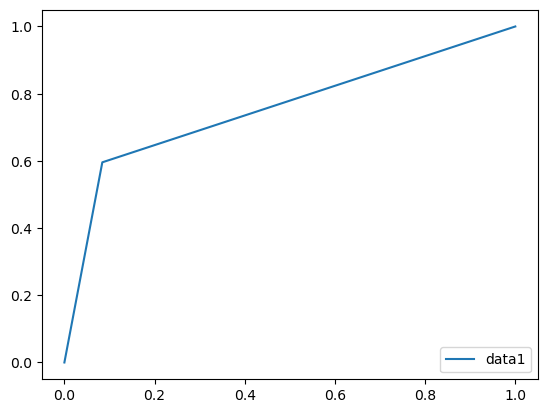

In [9]:
fpr,tpr, _ = metrics.roc_curve(Y_test , Y_pred)
plt.plot(fpr , tpr ,label="data1")
plt.legend(loc =4)
plt.show()

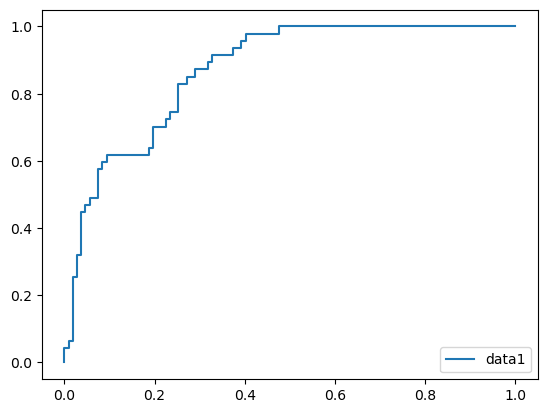

In [10]:
Y_pred_proba =logreg.predict_proba(X_test)[:: , 1]
fpr,tpr, _ = metrics.roc_curve(Y_test , Y_pred_proba)
plt.plot(fpr , tpr ,label="data1")
plt.legend(loc =4)
plt.show()

In [11]:
from sklearn.metrics import classification_report , confusion_matrix 
logreg.classes_

array([0, 1], dtype=int64)

In [12]:
logreg.intercept_

array([-5.44613897])

In [13]:
logreg.coef_

array([[ 0.08775006,  0.02669323, -0.01801035,  0.00423129, -0.00085631,
         0.05567346,  0.61413722,  0.01111874]])

In [14]:
logreg.predict_proba(X)

array([[0.33315735, 0.66684265],
       [0.89228363, 0.10771637],
       [0.25850521, 0.74149479],
       ...,
       [0.75587011, 0.24412989],
       [0.65992876, 0.34007124],
       [0.86574102, 0.13425898]])

In [15]:
logreg.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [16]:
logreg.score(X ,Y)

0.7747395833333334

In [18]:
confusion_matrix(Y , logreg.predict(X))

array([[446,  54],
       [119, 149]], dtype=int64)

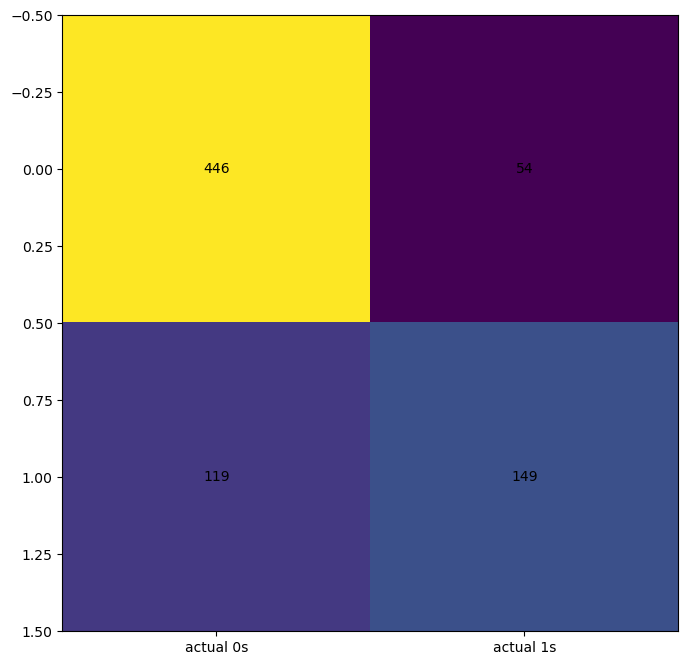

In [29]:
cm = confusion_matrix(Y , logreg.predict(X))
fig , ax = plt.subplots(figsize = (8 ,8))
ax.imshow(cm)
ax.grid =( False )
ax.xaxis.set( ticks = (0,1) , ticklabels=("predict 0s",'predict 1s'))
ax.xaxis.set( ticks = (0,1) , ticklabels=('actual 0s','actual 1s'))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range (2):
        ax.text(j, i,  cm[i , j] , ha='center', va ='center' , color = 'black') 
plt.show()

In [31]:
print(classification_report(Y , logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.77      0.77       768



In [34]:
model = LogisticRegression(solver ='liblinear' , C = 10.0 ,random_state = 0)
model.fit(X , Y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [35]:
df2 =pd.DataFrame({"Pregnancies":[0],
                  "Glucose":[80],
                  "BloodPressure":[72],
                  "SkinThickness":[0],
                  "Insulin":[0],
                  "BMI":[23],
                  "DiabetesPedigreeFunction":[0.5],
                  "Age":[0],
                  "Outcome":[0.5],})

In [41]:
data2 = pd.concat([ data ,df2],ignore_index = True)
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0.0
765,5,121,72,23,112,26.2,0.245,30,0.0
766,1,126,60,0,0,30.1,0.349,47,1.0
767,1,93,70,31,0,30.4,0.315,23,0.0
